### Part 1: Code Executing the Topic Modeling
We decided to use topic modeling for our exploratory analysis. Since the purpose of our project is to describe the evolution of certain themes in commercial rap, we decided to use a technique that would give us a better understanding of the abstract topics within our corpus. We used scikit-learns implementation of the LatentDirchletAllocation algorithm to extract the topics.
First, we read our corpus into a pandas data frame and remove any missing tracks.

In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
df = pandas.read_csv("../data/bbtop15-lyrics-exploring-tokenized.csv")

#drop rows where the text is missing.
df = df.dropna(subset=['lyrics'])

#view the dataframe
df


,track_id,track,artist,artist_gender,date,year,lyrics,lyrics_clean,tokens,tokens_clean,tokens_clean_lower,tokens_clean_lower_stopfree
0,0,Me So Horny,The 2 Live Crew,Male,1989-11-04,1989,"\n\n[Intro]\n""What'll we get for 10 dollars?""\...","\n\n\n""Whatll we get for 10 dollars?""\n""Every ...","[""''"", 'Whatll', 'we', 'get', 'for', '10', 'do...","['Whatll', 'we', 'get', 'for', '10', 'dollars'...","['whatll', 'we', 'get', 'for', '10', 'dollars'...","['whatll', 'get', '10', 'dollars', 'every', 't..."
1,1,Bust A Move,Young M.C.,Male,1989-11-04,1989,\n\n[Intro]\nBust it\n\n[Verse 1]\nThis here's...,\n\n\nBust it\n\n\nThis heres a jam for all th...,"['Bust', 'it', 'This', 'heres', 'a', 'jam', 'f...","['Bust', 'it', 'This', 'heres', 'a', 'jam', 'f...","['bust', 'it', 'this', 'heres', 'a', 'jam', 'f...","['bust', 'heres', 'jam', 'fellas', 'tryin', 'l..."
2,2,Smooth Operator,Big Daddy Kane,Male,1989-11-04,1989,"\n\n[Verse 1]\nWell excuse me, take a few minu...","\n\n\nWell excuse me, take a few minutes, to m...","['Well', 'excuse', 'me', ',', 'take', 'a', 'fe...","['Well', 'excuse', 'me', 'take', 'a', 'few', '...","['well', 'excuse', 'me', 'take', 'a', 'few', '...","['well', 'excuse', 'take', 'minutes', 'mellow'..."
3,3,Cha Cha Cha,MC Lyte,Female,1989-11-04,1989,\n\n[Kick this one here for me and my DJ]\n\nY...,\n\n\n\nYou can cha-cha-cha to this Mardis Gra...,"['You', 'can', 'cha-cha-cha', 'to', 'this', 'M...","['You', 'can', 'chachacha', 'to', 'this', 'Mar...","['you', 'can', 'chachacha', 'to', 'this', 'mar...","['chachacha', 'mardis', 'gras', 'im', 'dopest'..."
4,4,I Go To Work,Kool Moe Dee,Male,1989-11-04,1989,\n\n[Verse 1]\nI go to work like a doctor\nWhe...,\n\n\nI go to work like a doctor\nWhen I rock ...,"['I', 'go', 'to', 'work', 'like', 'a', 'doctor...","['I', 'go', 'to', 'work', 'like', 'a', 'doctor...","['i', 'go', 'to', 'work', 'like', 'a', 'doctor...","['go', 'work', 'like', 'doctor', 'rock', 'mic'..."
5,5,New Jack Swing,Wreckx-N-Effect,Male,1989-11-04,1989,"\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","['Yo', 'Wreckx-N-Effect', 'In', 'full', 'effec...","['Yo', 'WreckxNEffect', 'In', 'full', 'effect'...","['yo', 'wreckxneffect', 'in', 'full', 'effect'...","['yo', 'wreckxneffect', 'full', 'effect', 'wor..."
6,6,They Put Me In The Mix,M.C. Hammer,Male,1989-11-04,1989,\n\n[Hammer]\nYo! My Lone Mixer\nYou ready?\nB...,\n\n\nYo! My Lone Mixer\nYou ready?\nBust it!\...,"['Yo', '!', 'My', 'Lone', 'Mixer', 'You', 'rea...","['Yo', 'My', 'Lone', 'Mixer', 'You', 'ready', ...","['yo', 'my', 'lone', 'mixer', 'you', 'ready', ...","['yo', 'lone', 'mixer', 'ready', 'bust', 'lone..."
7,7,Just A Friend,Biz Markie,Male,1989-11-04,1989,\n\n[Intro]\nHave you ever met a girl that you...,\n\n\nHave you ever met a girl that you tried ...,"['Have', 'you', 'ever', 'met', 'a', 'girl', 't...","['Have', 'you', 'ever', 'met', 'a', 'girl', 't...","['have', 'you', 'ever', 'met', 'a', 'girl', 't...","['ever', 'met', 'girl', 'tried', 'date', 'year..."
8,8,It's Funky Enough,The D.O.C.,Male,1989-11-04,1989,\n\n[Intro]\nY'all ready for this\nRastafara S...,\n\n\nYall ready for this\nRastafara Sonna Mad...,"['Yall', 'ready', 'for', 'this', 'Rastafara', ...","['Yall', 'ready', 'for', 'this', 'Rastafara', ...","['yall', 'ready', 'for', 'this', 'rastafara', ...","['yall', 'ready', 'rastafara', 'sonna', 'madda..."
9,9,Somebody For Me,Heavy D & The Boyz,Male,1989-11-04,1989,\n\nOh yeah..\n\nLove somebo-dy...\n\n(Al B. S...,\n\nOh yeah..\n\nLove somebo-dy...\n\n(Al B. S...,"['Oh', 'yeah..', 'Love', 'somebo-dy', '...', '...","['Oh', 'yeah', 'Love', 'somebody', 'Al', 'B', ...","['oh', 'yeah', 'love', 'somebody', 'al', 'b', ...","['oh', 'yeah', 'love', 'somebody', 'al', 'b', ..."


### Feature extraction
In this nootbook we decided to use the CountVectorizer to transform the raw text in to a dtm.

In [3]:
###Adopted From: 
#Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


n_samples = 2317
n_topics = 6
n_top_words = 80

##This is a function to print out the top words for each topic in a pretty way.
#Don't worry too much about understanding every line of this code.
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [4]:
print("Extracting tf-idf features for LDA...")
tf_idf_vectorizer = TfidfVectorizer(max_df=0.80, min_df=50,
                                max_features=None,
                                stop_words='english', lowercase=True
                                )

tf_idf = tf_idf_vectorizer.fit_transform(df.lyrics_clean)

Extracting tf-idf features for LDA...


### Modeling
Next, we fit the model to our data.

In [5]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=20,
                                learning_method='online',
                                learning_offset=80.,
                                total_samples=n_samples,
                                random_state=0)
#fit the model
lda.fit(tf_idf)

Fitting LDA models with tf features, n_samples=2317 and n_topics=6...


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=80.0,
             max_doc_update_iter=100, max_iter=20, mean_change_tol=0.001,
             n_jobs=1, n_topics=6, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=2317, verbose=0)

In [7]:
print("\nTopics in LDA model:")
tf_feature_names = tf_idf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:

Topic #0:
cause oh youre just black yo say yeah ghetto ya jump come make thats people man stop uh groove goes time aint lets let youll boom look cool said daddy gotta brothers little em loves night funky play rhyme gonna brother break past love dance hes fight ill wanna insane hard right think tell yes girls start school party word booty smooth mic mind mc way rhymes gettin went comes theres home summer listen speak fuck dead tonight ride new

Topic #1:
funky left nice yo man cause suckers girls ya game aint right thought baby just silly yeah said tip say huh time girl shes drama la hey tonight hard places little skin working brother ride bit diss ladies god problem think excuse hold feds dem wrong really death al freak youre today wear keys drank player wasnt work safe stuntin stacks trouble record trap oh mind grow gonna spent tell love sayin cover fear church sucker stash steppin crew tomorrow

Topic #2:
mi swing fame rhyme mix la funky dem moms keeps smooth h

Document by Topic Distribution
We want to explore how the prevelenace of these topics change over time so we here we merge the topic distribution back into the Pandas dataframe. First get the topic distribution array.

In [10]:
topic_dist = lda.transform(tf_idf)


In [11]:
topic_dist_df = pandas.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(df)


In [12]:
print(df_w_topics[['track','artist', 'artist_gender', 0]].sort_values(by=[0], ascending=False))

                                             track  \
302                       Papa Was A Rolling Stone   
391                                       Shifftee   
58                                         Fame 90   
1033                              Who's That Girl?   
2065                                            KK   
1631                                 Boom Boom Pow   
1762                              Bad (That's Her)   
1623                        Kiss Me Thru The Phone   
6                           They Put Me In The Mix   
2029                                    Adrenalina   
2076                              L.A.LOVE (la la)   
2121                                      Watch Me   
1206  Roll Wit M.V.P. (We Be Like! The La La Song)   
1893                                 Gangnam Style   
1859                                       So Good   
253                                    Jump Around   
1680                                         Shots   
1651                        

### Part 2.2: Prevalence of Themes Over Time
The next part of our project involves plotting the trends of these themes over time. The code for doing so is exhibited below.

In [14]:
df_w_topics['lyrics_clean'] = df_w_topics['lyrics_clean'].apply(lambda x: len(str(x).split()))
df_w_topics['word_count'] = df_w_topics['lyrics_clean'].apply(lambda x: len(str(x).split()))

In [15]:
topic_columns = range(0,6)

In [16]:
col_list = []
for num in topic_columns:
    col = "%d_wc" % num
    col_list.append(col)
    #Solution
    df_w_topics[col] = df_w_topics[num] * df_w_topics['word_count']
    
df_w_topics

,0,1,2,3,4,5,track_id,track,artist,artist_gender,...,tokens_clean,tokens_clean_lower,tokens_clean_lower_stopfree,word_count,0_wc,1_wc,2_wc,3_wc,4_wc,5_wc
0,0.022125,0.022125,0.022125,0.022125,0.022125,0.889376,0,Me So Horny,The 2 Live Crew,Male,...,"['Whatll', 'we', 'get', 'for', '10', 'dollars'...","['whatll', 'we', 'get', 'for', '10', 'dollars'...","['whatll', 'get', '10', 'dollars', 'every', 't...",1,0.022125,0.022125,0.022125,0.022125,0.022125,0.889376
1,0.016685,0.016685,0.016685,0.016685,0.016685,0.916575,1,Bust A Move,Young M.C.,Male,...,"['Bust', 'it', 'This', 'heres', 'a', 'jam', 'f...","['bust', 'it', 'this', 'heres', 'a', 'jam', 'f...","['bust', 'heres', 'jam', 'fellas', 'tryin', 'l...",1,0.016685,0.016685,0.016685,0.016685,0.016685,0.916575
2,0.020089,0.020089,0.020089,0.020089,0.020089,0.899556,2,Smooth Operator,Big Daddy Kane,Male,...,"['Well', 'excuse', 'me', 'take', 'a', 'few', '...","['well', 'excuse', 'me', 'take', 'a', 'few', '...","['well', 'excuse', 'take', 'minutes', 'mellow'...",1,0.020089,0.020089,0.020089,0.020089,0.020089,0.899556
3,0.019023,0.019023,0.019023,0.019023,0.019023,0.904884,3,Cha Cha Cha,MC Lyte,Female,...,"['You', 'can', 'chachacha', 'to', 'this', 'Mar...","['you', 'can', 'chachacha', 'to', 'this', 'mar...","['chachacha', 'mardis', 'gras', 'im', 'dopest'...",1,0.019023,0.019023,0.019023,0.019023,0.019023,0.904884
4,0.016793,0.016793,0.016793,0.016793,0.016793,0.916036,4,I Go To Work,Kool Moe Dee,Male,...,"['I', 'go', 'to', 'work', 'like', 'a', 'doctor...","['i', 'go', 'to', 'work', 'like', 'a', 'doctor...","['go', 'work', 'like', 'doctor', 'rock', 'mic'...",1,0.016793,0.016793,0.016793,0.016793,0.016793,0.916036
5,0.021570,0.021570,0.021570,0.021570,0.021570,0.892151,5,New Jack Swing,Wreckx-N-Effect,Male,...,"['Yo', 'WreckxNEffect', 'In', 'full', 'effect'...","['yo', 'wreckxneffect', 'in', 'full', 'effect'...","['yo', 'wreckxneffect', 'full', 'effect', 'wor...",1,0.021570,0.021570,0.021570,0.021570,0.021570,0.892151
6,0.055055,0.055055,0.055055,0.055055,0.055055,0.724725,6,They Put Me In The Mix,M.C. Hammer,Male,...,"['Yo', 'My', 'Lone', 'Mixer', 'You', 'ready', ...","['yo', 'my', 'lone', 'mixer', 'you', 'ready', ...","['yo', 'lone', 'mixer', 'ready', 'bust', 'lone...",1,0.055055,0.055055,0.055055,0.055055,0.055055,0.724725
7,0.021760,0.021760,0.021760,0.021760,0.021760,0.891202,7,Just A Friend,Biz Markie,Male,...,"['Have', 'you', 'ever', 'met', 'a', 'girl', 't...","['have', 'you', 'ever', 'met', 'a', 'girl', 't...","['ever', 'met', 'girl', 'tried', 'date', 'year...",1,0.021760,0.021760,0.021760,0.021760,0.021760,0.891202
8,0.022345,0.022345,0.022345,0.022345,0.022345,0.888276,8,It's Funky Enough,The D.O.C.,Male,...,"['Yall', 'ready', 'for', 'this', 'Rastafara', ...","['yall', 'ready', 'for', 'this', 'rastafara', ...","['yall', 'ready', 'rastafara', 'sonna', 'madda...",1,0.022345,0.022345,0.022345,0.022345,0.022345,0.888276
9,0.023023,0.023023,0.023023,0.023023,0.023023,0.884886,9,Somebody For Me,Heavy D & The Boyz,Male,...,"['Oh', 'yeah', 'Love', 'somebody', 'Al', 'B', ...","['oh', 'yeah', 'love', 'somebody', 'al', 'b', ...","['oh', 'yeah', 'love', 'somebody', 'al', 'b', ...",1,0.023023,0.023023,0.023023,0.023023,0.023023,0.884886


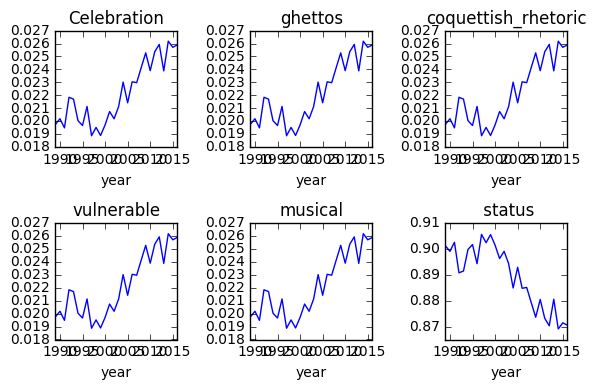

In [17]:
grouped_year = df_w_topics.groupby('year')
fig3 = plt.figure()
chrt = 0
titles= ['Celebration','ghettos','coquettish_rhetoric','vulnerable','musical',' status' ]
i = 0
for e in col_list:
    chrt += 1 
    ax2 = fig3.add_subplot(2,3, chrt)
    (grouped_year[e].sum()/grouped_year['word_count'].sum()).plot(kind='line', title=titles[i])
    i+=1
    
fig3.tight_layout()
plt.show()